CIS 9 - Lab 3b: unsupervised learning Solution

In [ ]:
# Name: Ulises Marian

In [1]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

For marketing purpose, the owner of an online business has asked you to group similar customers together based on the customer's number of sales transactions and amount spent.<br>
Use the k-means clustering model to group customers, and the input data is _onlineRetail.xlsx_ ([source](https://archive.ics.uci.edu/ml/datasets/online+retail)). The file contains online sales transactions during 2 years for a business in the UK.<br>

---
Part 1: Read data and do some preliminary checking / understanding of the data

In [2]:
# 1a. Read data from onlineRetail.xlsx
# 1b. Then print the first 8 lines of the DataFrame
# (The input file is large so it may take 1-2 min to load it in memory)

data = pd.read_excel("onlineRetail.xlsx")
data.head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom


In [ ]:
# 2. Print the number of data records and the number of features in the dataset
data.shape

In [4]:
#3. Print basic statistics on the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Based on the statistics in the previous step<br>
- investigate any value that's unusual / unexpected
- then print the rows of data that's unusual to see what they are
- and explain what might be the reason

The cell below is set up for _one_ instance of unusual data and has the 3 steps you do to investigate it. Feel free to copy and create similar cells to investigate all unusual data you want to investigate.

In [5]:
# describe what's unusual:
# The min of the Quantity, which is a (very big) negative number

# print the unusual data (or part of it) to check it

stats = data.describe()
#print(stats[stats.columns[0:2]])   #printing columns 'Quantity' and 'UnitPrice'
print(stats.at['min', 'Quantity'])
stats.loc[["min"]]

# possible explanation for the data: 
# The quantity is negative because it was returned, thus from being positive 80995 (which is the max),
# it went to -80995 upon being returned



-80995.0


,Quantity,UnitPrice,CustomerID
min,-80995.0,-11062.06,12346.0


In [10]:
# describe what's unusual:
# The min of the UnitPrice, which is a (very big) negative number

# print the unusual data (or part of it) to check it

stats = data.describe()
print(stats.at['min', 'UnitPrice'])
stats[stats.columns[0:2]]
stats.loc[["min"]]

# possible explanation for the data: 
# This is the price of the most expensive item returned

-11062.06


,Quantity,UnitPrice,CustomerID
min,-80995.0,-11062.06,12346.0


---
Part 2: clean data

In [6]:
# 4a. Check for NaN's in the dataset
# The output should be the number of NaN's for each feature
nan_count = data.isna().sum()
print(nan_count, '\n')

# 4b. Then print the number of NaN's for each feture as a percentage
# of the total rows. Example: 12.23 (for 12.23%)
for count in nan_count:
    print(count/len(data) * 100)
    
#another way to calculate percentages
#print(round(100 * data.isna().sum / len(data), 2))
    
#len(data)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64 

0.0
0.0
0.2683107311375157
0.0
0.0
0.0
24.926694334288598
0.0


In [8]:
# 5a. Remove the rows where CustomerID is NaN and save the remaining rows 
# to a new DataFrame

df = data.dropna(subset = ["CustomerID"])
df


# 5b. Confirm by printing the difference between the number of rows of the 
# original DataFrame and the number of rows of the new DataFrame.
# It should be the same as the number of NaN's for CustomerID in part 4a

print(f"{len(data)} - {len(df)} = {len(data) - len(df)}")
print(f"number of NaN's for CustomerID: {nan_count['CustomerID']}")


541909 - 406829 = 135080
number of NaN's for CustomerID: 135080


In [21]:
# 6. CustomerID is float data type. Change it to int by using astype(int)
# Example:  df = df.astype({'colA':int})   # colA now has int data type
# Print the first lines of the DataFrame

df = df.astype({"CustomerID":int})

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


---
Part 3. Prepare data<br>
For this exercise we'll work with 2 features: the number of purchases and the total amount a customer spent 

In [13]:
# 7. From the CustomerID column, note that one customer can make multiple purchases 
# (shown as duplicate CustomerID's)
# Create a new DataFrame with CustomerID's and the number of purchases for each customer.
# The number of purchases for a customer is the number of rows with that CustomerID.
# (Note: You can choose any column of the original DataFrame to store in the new DataFrame,
# it doesn't have to be InvoiceNo)


# count the number of rows
save_df = df.groupby("CustomerID").count()
save_df
purchases = save_df[["InvoiceNo"]]
purchases

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [15]:
# 8. Find the total purchase amount for each CustomerID
# Similar to step 7, create a new DataFrame with CustomerID's and the total purchase 
# amount for that customer.
# The purchase amount for one transaction is the (Quantity * UnitPrice)

#create new column
df["Total"] = df.Quantity * df.UnitPrice

purchase_amount = df.groupby("CustomerID").sum()
purchase_amount.drop(columns=["Quantity", "UnitPrice"], inplace=True)
purchase_amount

<ipython-input-15-71a51a12e1e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total"] = df.Quantity * df.UnitPrice


,Total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [18]:
# 9. Combine the 2 DataFrames of steps 7 and 8 into a new DataFrame
# Show the first 5 lines of the new DataFrame

purchases_and_total = pd.concat([purchases,purchase_amount], axis=1)

purchases_and_total.head()

,InvoiceNo,Total
CustomerID,,
12346.0,2,0.00
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40


In [19]:
# 10a. Change the CustomerID (the index) into a column
purchases_and_total.reset_index(inplace=True)
purchases_and_total

,CustomerID,InvoiceNo,Total
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4367,18280.0,10,180.60
4368,18281.0,7,80.82
4369,18282.0,13,176.60
4370,18283.0,756,2094.88


In [20]:
# 10b. Change the InvoiceNo column to "Purchases"

purchases_and_total.rename(columns={"InvoiceNo" : "Purchases"}, inplace=True)
purchases_and_total

#creating a copy for use in 16b, where I need the CustomerIDs
saving_copy = purchases_and_total.copy()
#saving_copy

purchases_and_total

,CustomerID,Purchases,Total
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4367,18280.0,10,180.60
4368,18281.0,7,80.82
4369,18282.0,13,176.60
4370,18283.0,756,2094.88


In [21]:
# 10c. Drop the CustomerID column. 
# You now have the 2 features that will be used for the ML model.

purchases_and_total.drop(columns=["CustomerID"], inplace=True)
purchases_and_total


,Purchases,Total
0,2,0.00
1,182,4310.00
2,31,1797.24
3,73,1757.55
4,17,334.40
...,...,...
4367,10,180.60
4368,7,80.82
4369,13,176.60
4370,756,2094.88


---
Part 4. Analyze data

In [22]:
# 11. Print basic statistics of Purchases and Total
purchases_and_total.describe()

,Purchases,Total
count,4372.000000,4372.000000
mean,93.053294,1898.459701
std,232.471608,8219.345141
min,1.000000,-4287.630000
25%,17.000000,293.362500
50%,42.000000,648.075000
75%,102.000000,1611.725000
max,7983.000000,279489.020000


Based on the statistics above, both the Purchases and Total have outliers that are much larger than the 75th percentile or much smaller than the 25th percentile.<br>
Do some investigating work to see the outliers and remove them from the DataFrame.

Note that to do your investigation, you should _not have to look up and use methods and concepts that we haven't discussed in class_. Instead use data visualization (plots) to observe the range of values where the majority of the data points are, and remove those that are too far from the range.<br>
(This isn't as accurate as you might want, but it's "good enough" for this analysis task. [Here](https://statisticsbyjim.com/basics/outliers/) is a further discussion of evaluating outliers, especially the suggested plots for finding outliers, and the concluding paragraphs about identifying outliers)

,Purchases,Total
count,3020.000000,3.020000e+03
mean,33.717219,5.321072e+02
std,26.244755,3.975434e+02
min,1.000000,1.243450e-14
25%,13.000000,2.185425e+02
50%,27.000000,4.055000e+02
75%,49.000000,7.410275e+02
max,109.000000,1.698940e+03


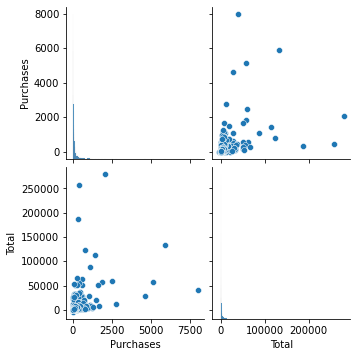

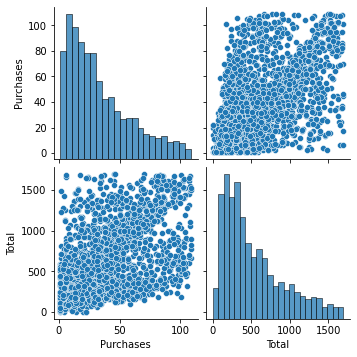

In [23]:
# 12. Show the plot(s) that you use, then remove the outliers from the DataFrame.

import seaborn as sns

#plot with outliers
sns.pairplot(purchases_and_total)

# fig = plt.figure(figsize=(12,4))
# plt.subplot(1,3,1)   # 1 row, 3 cols, subplot 1
# plt.scatter(purchases_and_total.Purchases, purchases_and_total.Total)
# plt.xlabel("Purchases")
# plt.ylabel("Total Amount")
# plt.show()

#removing outliers!!!
purchases_and_total = purchases_and_total[(purchases_and_total.Purchases < 110)]
purchases_and_total = purchases_and_total[(purchases_and_total.Total < 1700) & (purchases_and_total.Total > 0)]

#new plot after removing outliers
# plt.subplot(1,3,2)   # 1 row, 3 cols, subplot 2
# plt.scatter(purchases_and_total.Purchases, purchases_and_total.Total)
# plt.xlabel("Purchases")
# plt.ylabel("Total Amount")

#new plot after removing outliers
sns.pairplot(purchases_and_total)

# Print the basic statistics after the outliers are dropped
purchases_and_total.describe()

---
Part 5: Use k-Means Clustering<br>
Now the data is ready for the ML model

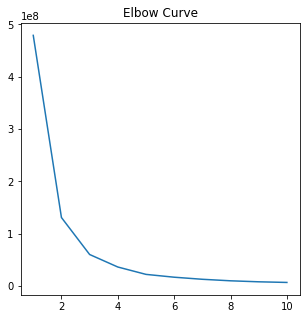

In [24]:
# 13. Find the optimum number of clusters

X = purchases_and_total

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')   # k-means++ is a good general purpose seed value for randomly selecting the initial centroids
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [25]:
# 14. Train the model

#From the above plot, we use k = 3 to create the model, train and test the model
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 1 0 ... 0 0 0]


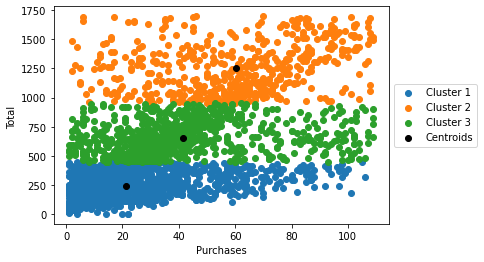

In [26]:
# 15. Plot the resulting clusters. Each cluster is a grouping of customers.
for i in range(3):
    plt.scatter(X[y_kmeans == i].Purchases, X[y_kmeans == i].Total, label = f'Cluster {i + 1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('Purchases')
plt.ylabel('Total ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

16a. Choose 1 cluster from the plot.<br>
Explain the purchasing behavior of customers in your chosen cluster, in terms of numer of purchases and the amount spent

In [370]:
#Cluster 1, customers in cluster 1 usually make the least number of purchases and spend the least.
#Based on the centroid, we see that customers in cluster 1 make in average 20 purchases and spend a total of $250.00

16b. Find all the CustomerID's in your chosen cluster

In [57]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = y_kmeans
cluster_map

# ind is index of rows that belong to cluster 1
ind = cluster_map[cluster_map.cluster == 0].data_index.values
#print(ind)

# using ind to find all customers that belong to cluster 1

all_customerIDs = saving_copy.loc[ind]
#all_customerIDs[customerIDs]
just_customerIDs = all_customerIDs["CustomerID"].values
list_customerIDs = list(just_customerIDs)

16c. Take the cleaned DataFrame (from the end of Part 2) and change the index to CustomerID.<br>
Then use result of 15b to print all the rows of the cleaned DataFrame that are in your chosen cluster.

You can now show the business owner all the sales transaction details for one group of customers.<br>
From the data shown, perhaps the business owner will ask you to check which country do most customers come from, or what are the top 25 items (StockCode) that these customers tend to order, or what months are the most active months, etc. in order to send customized ads(!) to the customers.

In [368]:
df1 = df.set_index("CustomerID")
df1.loc[list_customerIDs]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total
CustomerID,,,,,,,,
12350,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,25.20
12350,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02 16:01:00,2.10,Norway,25.20
12350,543037,79066K,RETRO MOD TRAY,10,2011-02-02 16:01:00,0.85,Norway,8.50
12350,543037,79191C,RETRO PLASTIC ELEPHANT TRAY,12,2011-02-02 16:01:00,0.85,Norway,10.20
12350,543037,22348,TEA BAG PLATE RED RETROSPOT,24,2011-02-02 16:01:00,0.85,Norway,20.40
...,...,...,...,...,...,...,...,...
18282,580173,22423,REGENCY CAKESTAND 3 TIER,2,2011-12-02 11:43:00,12.75,United Kingdom,25.50
18282,580173,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-12-02 11:43:00,2.95,United Kingdom,17.70
18282,580173,22818,CARD CHRISTMAS VILLAGE,12,2011-12-02 11:43:00,0.42,United Kingdom,5.04
